#                                                         Monday Coffee Company sales analysis for opening new cities

In [2]:
pip install mysql-connector-python pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import mysql.connector
import pandas as pd

# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="root",         
    password="Imarticus",  
    database="project"    
)

### Q.1 Coffee Consumers Count
### How many people in each city are estimated to consume coffee, given that 25% of the population does?


In [7]:
query1 = """SELECT 
	city_name,
	ROUND(
	(population * 0.25)/1000000, 
	2) as coffee_consumers_in_millions,
	city_rank
FROM city
ORDER BY 2 DESC;
"""

In [9]:
df = pd.read_sql(query1, conn)

C:\Users\hp\AppData\Local\Temp\ipykernel_14416\1266032527.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query1, conn)


In [11]:
df

,city_name,coffee_consumers_in_millions,city_rank
0,Delhi,7.75,3
1,Mumbai,5.10,2
2,Kolkata,3.73,7
3,Bangalore,3.08,1
4,Chennai,2.78,6
5,Hyderabad,2.50,4
6,Ahmedabad,2.08,5
7,Pune,1.88,9
8,Surat,1.80,10
9,Jaipur,1.00,8


C:\Users\hp\AppData\Local\Temp\ipykernel_14416\1591303588.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="coffee_consumers_in_millions", y="city_name", palette="magma")


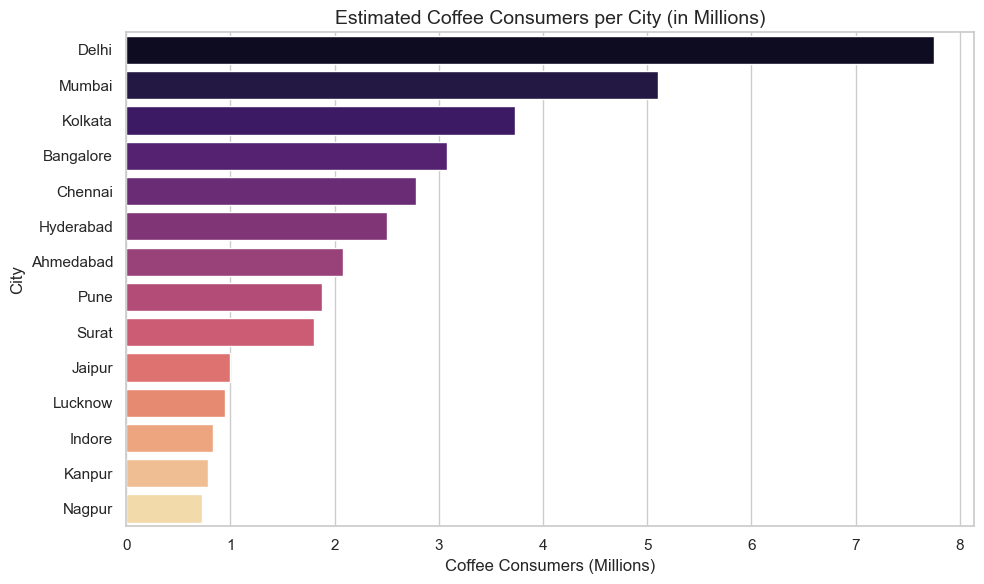

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="coffee_consumers_in_millions", y="city_name", palette="magma")

plt.title("Estimated Coffee Consumers per City (in Millions)", fontsize=14)
plt.xlabel("Coffee Consumers (Millions)")
plt.ylabel("City")

plt.tight_layout()
plt.show()

### Q.2 Total Revenue from Coffee Sales
### What is the total revenue generated from coffee sales across all cities in the last quarter of 2023?

In [16]:
# Query: total revenue per city in Q4 2023
query2 = """
SELECT 
    ci.city_name,
    SUM(s.total) as total_revenue
FROM sales as s
JOIN customers as c ON s.customer_id = c.customer_id
JOIN city as ci ON ci.city_id = c.city_id
WHERE 
    EXTRACT(YEAR FROM s.sale_date) = 2023
    AND EXTRACT(quarter FROM s.sale_date) = 4
GROUP BY 1
ORDER BY 2 DESC;
"""

df2 = pd.read_sql(query2, conn)


C:\Users\hp\AppData\Local\Temp\ipykernel_14416\2864041716.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2, conn)


In [18]:
df2

,city_name,total_revenue
0,Pune,434330.0
1,Chennai,302500.0
2,Bangalore,270780.0
3,Jaipur,248580.0
4,Delhi,238490.0
5,Kanpur,71890.0
6,Mumbai,71340.0
7,Surat,52560.0
8,Kolkata,51180.0
9,Nagpur,45810.0


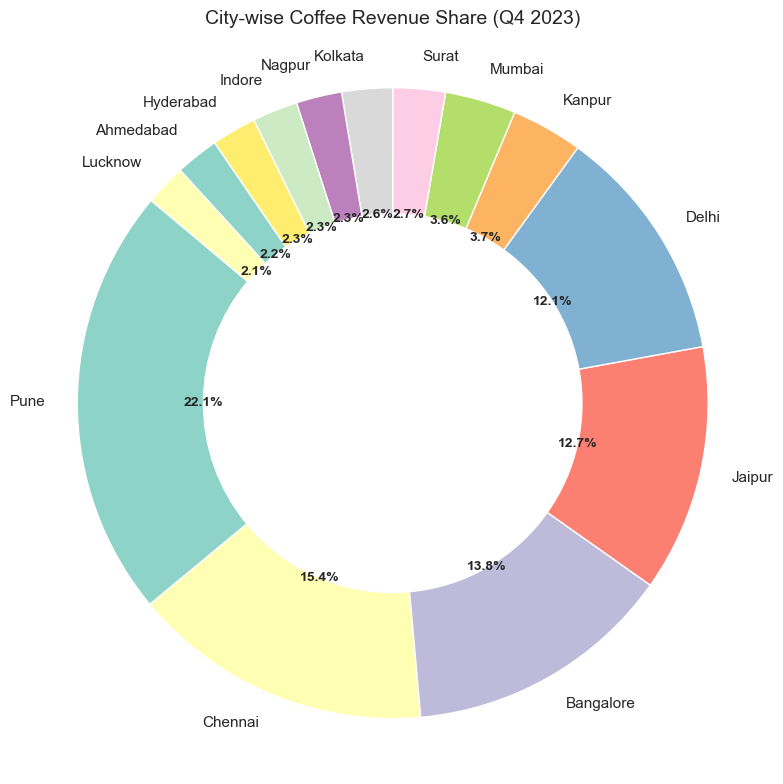

In [20]:
# Plot revenue per city
plt.figure(figsize=(8, 8))

colors = sns.color_palette("Set3", len(df))

wedges, texts, autotexts = plt.pie(
    df2['total_revenue'],
    labels=df2['city_name'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)  # Creates the "donut hole"
)

plt.setp(autotexts, size=10, weight="bold")
plt.title("City-wise Coffee Revenue Share (Q4 2023)", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.show()


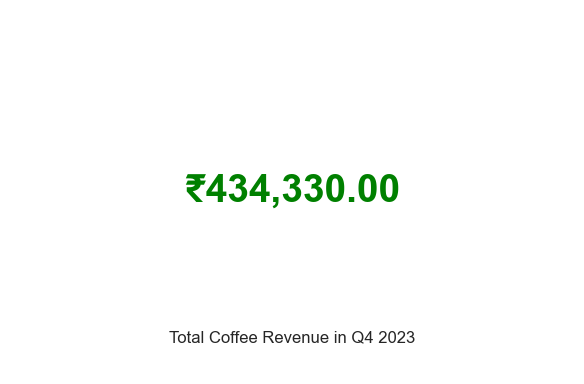

In [22]:
import matplotlib.pyplot as plt

# Extract total revenue
total_revenue = df2['total_revenue'][0]

# Plot a big number in the center
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, f"₹{total_revenue:,.2f}",
         fontsize=28, ha='center', va='center', weight='bold', color='green')

plt.text(0.5, 0.1, "Total Coffee Revenue in Q4 2023",
         fontsize=12, ha='center', va='center')

plt.axis("off") 
plt.tight_layout()
plt.show()


### Q.3 Sales Count for Each Product
### How many units of each coffee product have been sold?


In [25]:
query3 = """SELECT 
	p.product_name,
	COUNT(s.sale_id) as total_orders
FROM products as p
LEFT JOIN
sales as s
ON s.product_id = p.product_id
GROUP BY 1
ORDER BY 2 DESC;
"""

df3 = pd.read_sql(query3, conn)

C:\Users\hp\AppData\Local\Temp\ipykernel_14416\992079065.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query3, conn)


In [27]:
df3

,product_name,total_orders
0,Cold Brew Coffee Pack (6 Bottles),1326
1,Ground Espresso Coffee (250g),1271
2,Instant Coffee Powder (100g),1226
3,Coffee Beans (500g),1218
4,Tote Bag with Coffee Design,776
5,Vanilla Coffee Syrup (250ml),762
6,Cold Brew Concentrate (500ml),312
7,Organic Green Coffee Beans (500g),307
8,Coffee Art Print,296
9,Flavored Coffee Pods (Pack of 10),295


C:\Users\hp\AppData\Local\Temp\ipykernel_14416\567710110.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df3, x="total_orders", y="product_name", palette="rocket")


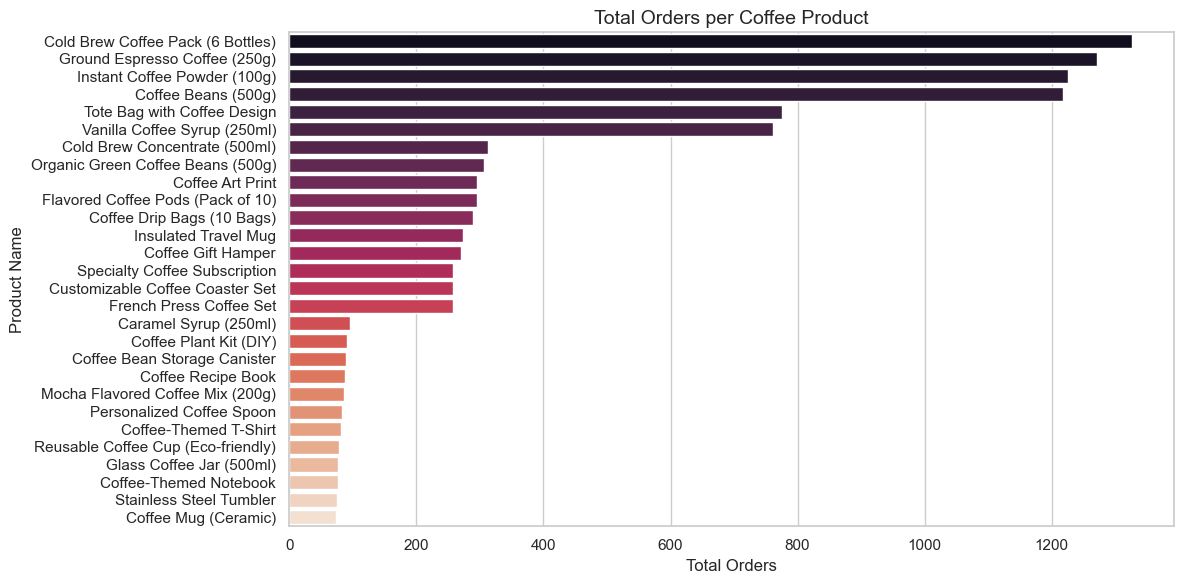

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=df3, x="total_orders", y="product_name", palette="rocket")

plt.title("Total Orders per Coffee Product", fontsize=14)
plt.xlabel("Total Orders")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


### Q.4 Average Sales Amount per City
### What is the average sales amount per customer in each city?


In [32]:
query4 = """SELECT 
    ci.city_name,
    SUM(s.total) AS total_revenue,
    COUNT(DISTINCT s.customer_id) AS total_cx,
    ROUND(SUM(s.total) / COUNT(DISTINCT s.customer_id), 2) AS avg_sale_pr_cx
FROM sales AS s
JOIN customers AS c ON s.customer_id = c.customer_id
JOIN city AS ci ON ci.city_id = c.city_id
GROUP BY ci.city_name
ORDER BY total_revenue DESC;"""

df4 = pd.read_sql(query4, conn)
conn.close()

C:\Users\hp\AppData\Local\Temp\ipykernel_14416\972421524.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query4, conn)


In [34]:
df4

,city_name,total_revenue,total_cx,avg_sale_pr_cx
0,Pune,1258290.0,52,24197.88
1,Chennai,944120.0,42,22479.05
2,Bangalore,860110.0,39,22054.10
3,Jaipur,803450.0,69,11644.20
4,Delhi,750420.0,68,11035.59
5,Mumbai,235000.0,27,8703.70
6,Kanpur,213550.0,35,6101.43
7,Surat,176540.0,27,6538.52
8,Kolkata,171460.0,28,6123.57
9,Nagpur,140050.0,24,5835.42


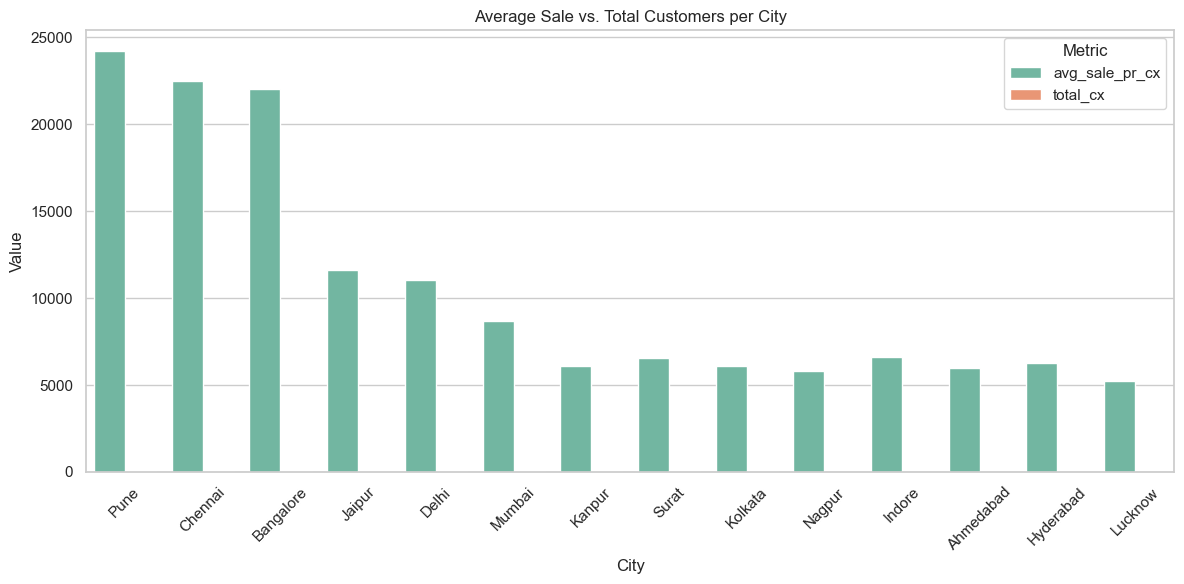

In [36]:
df_melted = df4.melt(id_vars="city_name", value_vars=["avg_sale_pr_cx", "total_cx"],
                    var_name="Metric", value_name="Value")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="city_name", y="Value", hue="Metric", palette="Set2")

plt.title("Average Sale vs. Total Customers per City")
plt.xlabel("City")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q.5 City Population and Coffee Consumers (25%)
### *Provide a list of cities along with their populations and estimated coffee consumers.

In [39]:
import mysql.connector
import pandas as pd


conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Imarticus",
    database="project"
)

query5 = """
WITH city_table AS (
    SELECT 
        city_name,
        ROUND((population * 0.25)/1000000, 2) AS coffee_consumers
    FROM city
),
customers_table AS (
    SELECT 
        ci.city_name,
        COUNT(DISTINCT c.customer_id) AS unique_cx
    FROM sales AS s
    JOIN customers AS c ON c.customer_id = s.customer_id
    JOIN city AS ci ON ci.city_id = c.city_id
    GROUP BY 1
)
SELECT 
    customers_table.city_name,
    city_table.coffee_consumers AS coffee_consumer_in_millions,
    customers_table.unique_cx
FROM city_table
JOIN customers_table ON city_table.city_name = customers_table.city_name;
"""

df5 = pd.read_sql(query5, conn)
conn.close()

C:\Users\hp\AppData\Local\Temp\ipykernel_14416\4076316473.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql(query5, conn)


In [41]:
df5

,city_name,coffee_consumer_in_millions,unique_cx
0,Bangalore,3.08,39
1,Chennai,2.78,42
2,Pune,1.88,52
3,Jaipur,1.00,69
4,Delhi,7.75,68
5,Mumbai,5.10,27
6,Hyderabad,2.50,21
7,Ahmedabad,2.08,23
8,Kolkata,3.73,28
9,Surat,1.80,27


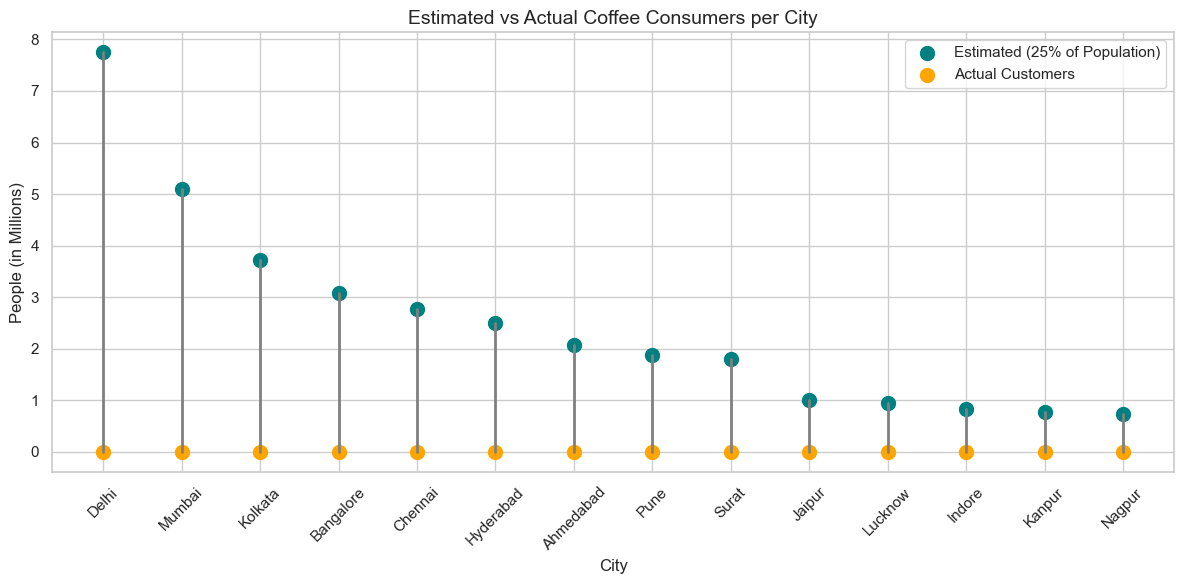

In [43]:
import matplotlib.pyplot as plt

# Sort data by estimated coffee consumers
df_sorted = df5.sort_values("coffee_consumer_in_millions", ascending=False)

plt.figure(figsize=(12, 6))

for i, row in df_sorted.iterrows():
    plt.plot([row['city_name'], row['city_name']], 
             [row['unique_cx'] / 1_000_000, row['coffee_consumer_in_millions']], 
             color='gray', linewidth=2)

plt.scatter(df_sorted['city_name'], 
            df_sorted['coffee_consumer_in_millions'], 
            color='teal', label='Estimated (25% of Population)', s=100)

plt.scatter(df_sorted['city_name'], 
            df_sorted['unique_cx'] / 1_000_000, 
            color='orange', label='Actual Customers', s=100)

plt.title("Estimated vs Actual Coffee Consumers per City", fontsize=14)
plt.xlabel("City")
plt.ylabel("People (in Millions)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


### Q6 Top Selling Products by City
### *What are the top 3 selling products in each city based on sales volume?


In [46]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Imarticus",
    database="project"
)

query6 = """SELECT 
    city_name,
    product_name,
    total_orders
FROM (
    SELECT 
        ci.city_name,
        p.product_name,
        COUNT(s.sale_id) AS total_orders,
        DENSE_RANK() OVER (
            PARTITION BY ci.city_name
            ORDER BY COUNT(s.sale_id) DESC
        ) AS ranks
    FROM sales s
    JOIN products p ON s.product_id = p.product_id
    JOIN customers c ON s.customer_id = c.customer_id
    JOIN city ci ON c.city_id = ci.city_id
    GROUP BY ci.city_name, p.product_name
) AS sub
WHERE ranks <= 3;
"""

df6 = pd.read_sql(query6, conn)
conn.close()

C:\Users\hp\AppData\Local\Temp\ipykernel_14416\3345228574.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df6 = pd.read_sql(query6, conn)


In [48]:
df6

,city_name,product_name,total_orders
0,Ahmedabad,Cold Brew Coffee Pack (6 Bottles),40
1,Ahmedabad,Coffee Beans (500g),35
2,Ahmedabad,Instant Coffee Powder (100g),26
3,Bangalore,Cold Brew Coffee Pack (6 Bottles),197
4,Bangalore,Ground Espresso Coffee (250g),167
5,Bangalore,Instant Coffee Powder (100g),150
6,Chennai,Cold Brew Coffee Pack (6 Bottles),192
7,Chennai,Coffee Beans (500g),181
8,Chennai,Instant Coffee Powder (100g),172
9,Delhi,Ground Espresso Coffee (250g),183


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

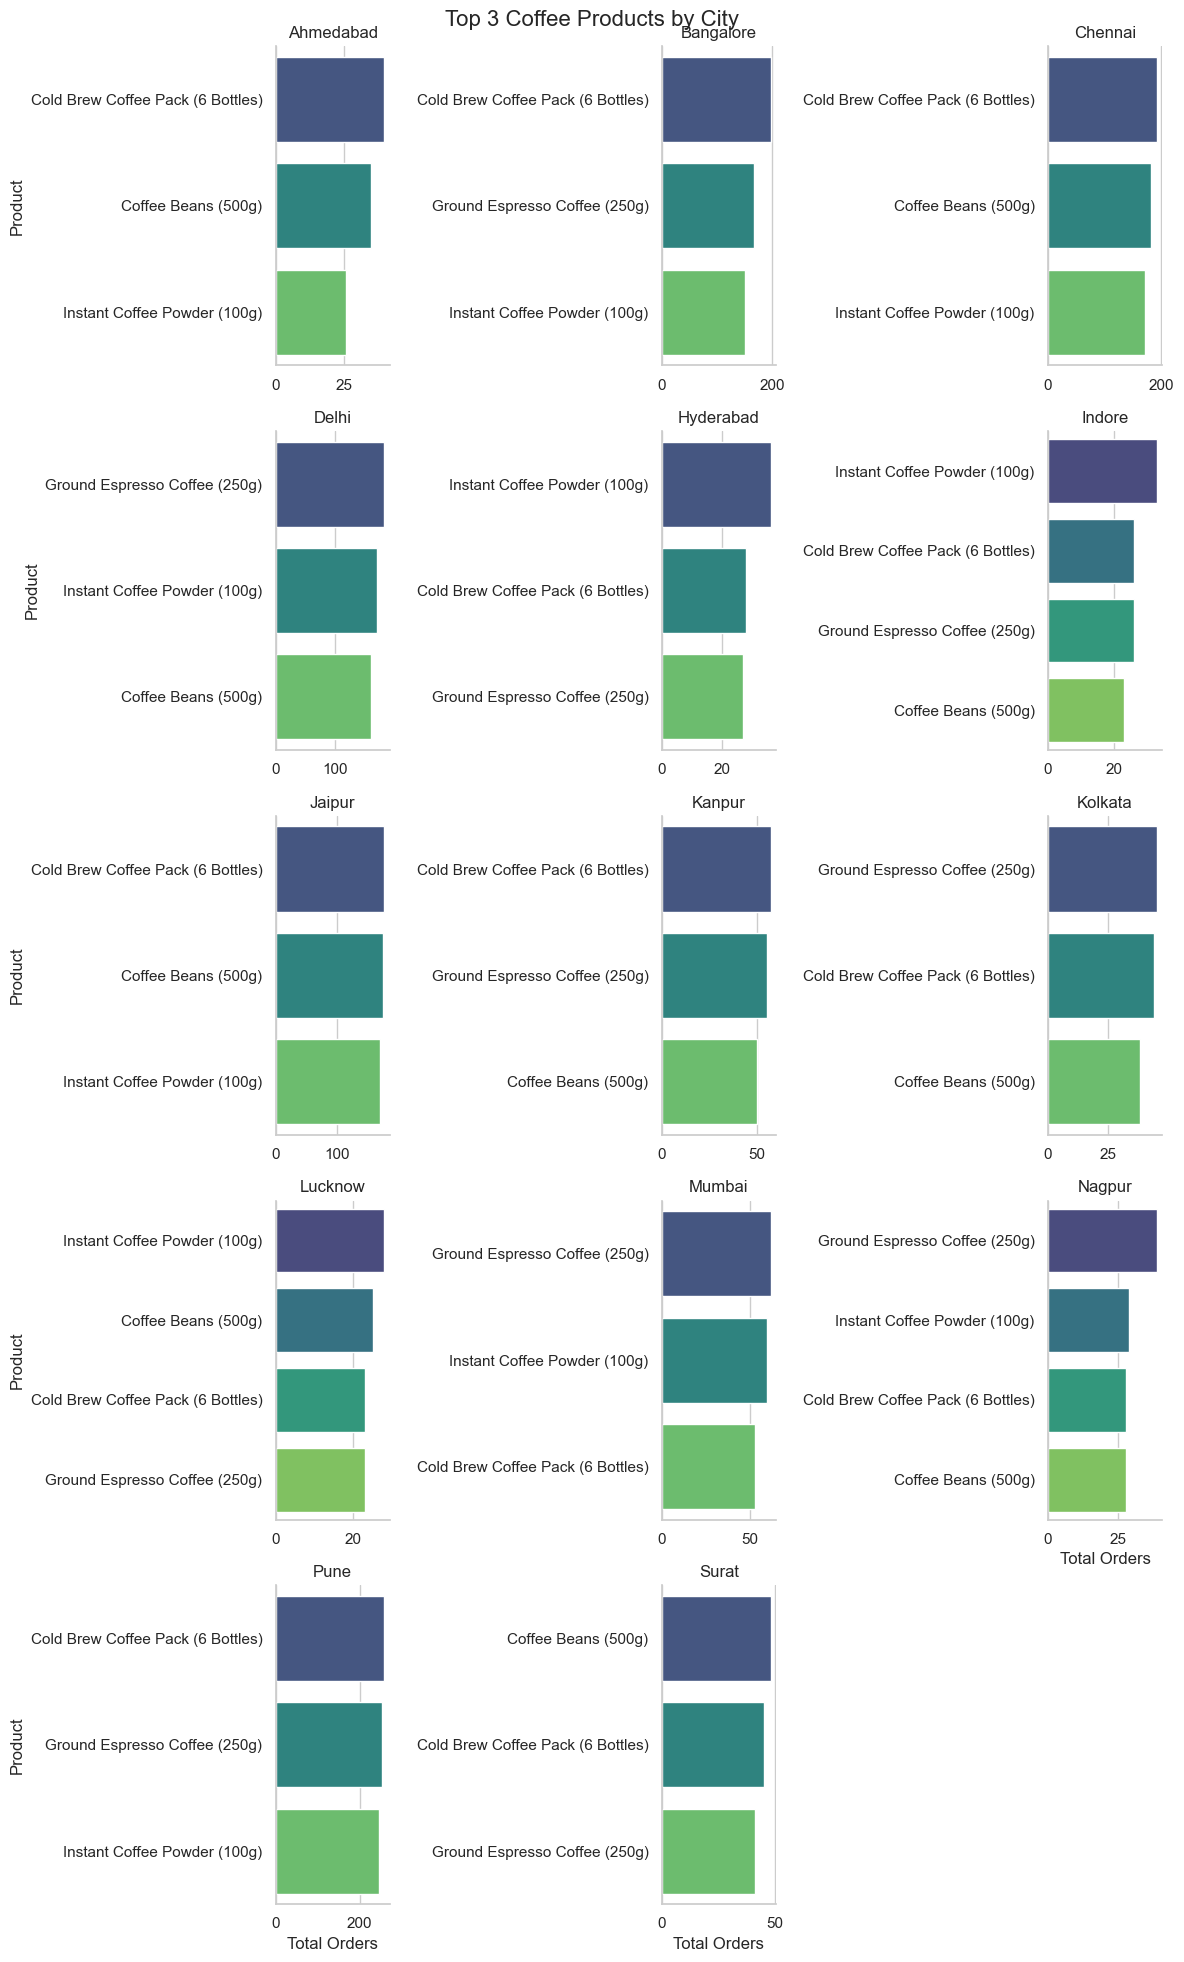

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df6, col="city_name", col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x="total_orders", y="product_name", palette="viridis")

g.set_titles("{col_name}")
g.set_axis_labels("Total Orders", "Product")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Top 3 Coffee Products by City", fontsize=16)
plt.tight_layout()
plt.show()


### Q.7 Customer Segmentation by City
### *How many unique customers are there in each city who have purchased coffee products?


In [53]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Imarticus",
    database="project"
)

query7 = """SELECT 
	ci.city_name,
	COUNT(DISTINCT c.customer_id) as unique_cx
FROM city as ci
LEFT JOIN
customers as c
ON c.city_id = ci.city_id
JOIN sales as s
ON s.customer_id = c.customer_id
WHERE 
	s.product_id IN (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)
GROUP BY 1;
"""

df7 = pd.read_sql(query7, conn)
conn.close()

C:\Users\hp\AppData\Local\Temp\ipykernel_14416\197432901.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df7 = pd.read_sql(query7, conn)


In [55]:
df7

,city_name,unique_cx
0,Ahmedabad,23
1,Bangalore,39
2,Chennai,42
3,Delhi,68
4,Hyderabad,21
5,Indore,21
6,Jaipur,69
7,Kanpur,35
8,Kolkata,28
9,Lucknow,21


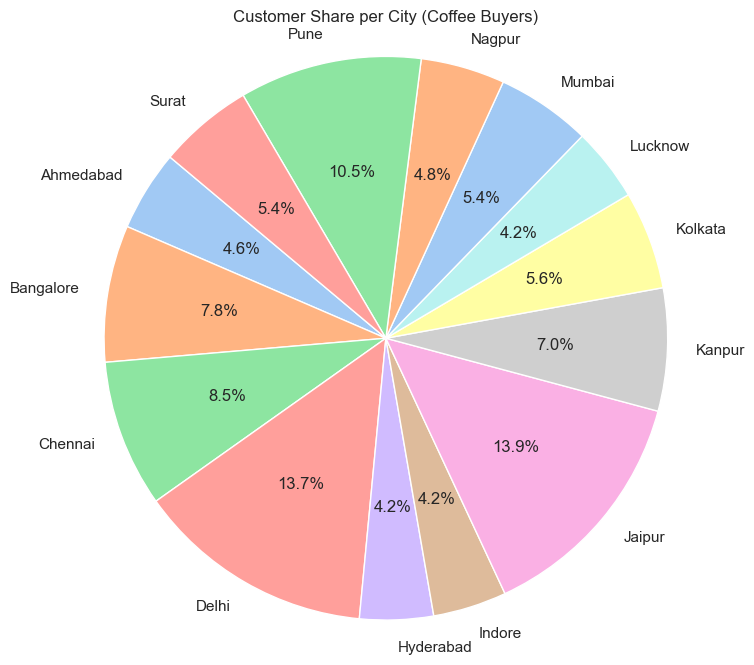

In [57]:
plt.figure(figsize=(8, 8))
plt.pie(
    df7['unique_cx'],
    labels=df7['city_name'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)

plt.title("Customer Share per City (Coffee Buyers)")
plt.axis('equal')
plt.show()


### Q.8 Average Sale vs Rent
### *Find each city and their average sale per customer and avg rent per customer



In [60]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Imarticus",
    database="project"
)

query8 = """WITH city_table AS (
    SELECT 
        ci.city_name,
        SUM(s.total) AS total_revenue,
        COUNT(DISTINCT s.customer_id) AS total_cx,
        ROUND(SUM(s.total) / COUNT(DISTINCT s.customer_id), 2) AS avg_sale_pr_cx
    FROM sales s
    JOIN customers c ON s.customer_id = c.customer_id
    JOIN city ci ON ci.city_id = c.city_id
    GROUP BY ci.city_name
),
city_rent AS (
    SELECT 
        city_name, 
        estimated_rent
    FROM city
)
SELECT 
    cr.city_name,
    cr.estimated_rent,
    ct.total_cx,
    ct.avg_sale_pr_cx,
    ROUND(cr.estimated_rent / ct.total_cx, 2) AS avg_rent_per_cx
FROM city_rent cr
JOIN city_table ct ON cr.city_name = ct.city_name
ORDER BY ct.avg_sale_pr_cx DESC;
""" 

df8 = pd.read_sql(query8, conn)
conn.close()

C:\Users\hp\AppData\Local\Temp\ipykernel_14416\333060918.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df8 = pd.read_sql(query8, conn)


In [62]:
df8

,city_name,estimated_rent,total_cx,avg_sale_pr_cx,avg_rent_per_cx
0,Pune,15300.0,52,24197.88,294.23
1,Chennai,17100.0,42,22479.05,407.14
2,Bangalore,29700.0,39,22054.10,761.54
3,Jaipur,10800.0,69,11644.20,156.52
4,Delhi,22500.0,68,11035.59,330.88
5,Mumbai,31500.0,27,8703.70,1166.67
6,Indore,6300.0,21,6599.52,300.00
7,Surat,13500.0,27,6538.52,500.00
8,Hyderabad,22500.0,21,6262.86,1071.43
9,Kolkata,16200.0,28,6123.57,578.57


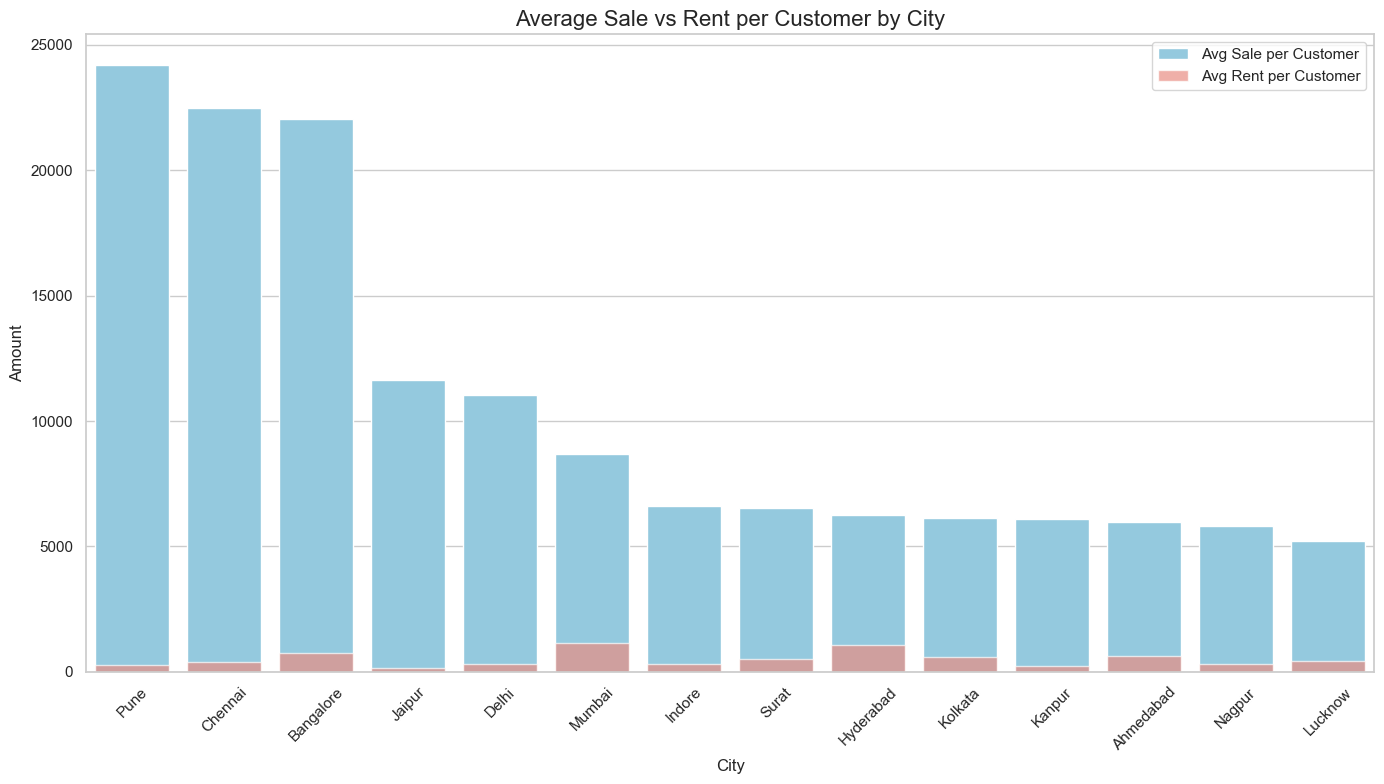

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

sns.barplot(data=df8, x="city_name", y="avg_sale_pr_cx", color="skyblue", label="Avg Sale per Customer")

# Plot Avg Rent per Customer
sns.barplot(data=df8, x="city_name", y="avg_rent_per_cx", color="salmon", label="Avg Rent per Customer", alpha=0.7)

plt.title("Average Sale vs Rent per Customer by City", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()



### Q.9 Monthly Sales Growth
### *Sales growth rate: Calculate the percentage growth (or decline) in sales over different time periods (monthly) by each city


In [67]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Imarticus",
    database="project"
)

query9 = """WITH monthly_sales AS (
    SELECT 
        ci.city_name,
        MONTH(s.sale_date) AS month,
        YEAR(s.sale_date) AS year,
        SUM(s.total) AS total_sale
    FROM sales s
    JOIN customers c ON s.customer_id = c.customer_id
    JOIN city ci ON ci.city_id = c.city_id
    GROUP BY ci.city_name, MONTH(s.sale_date), YEAR(s.sale_date)
),
growth_ratio AS (
    SELECT
        city_name,
        month,
        year,
        total_sale AS cr_month_sale,
        LAG(total_sale, 1) OVER (
            PARTITION BY city_name ORDER BY year, month
        ) AS last_month_sale
    FROM monthly_sales
)

SELECT
    city_name,
    month,
    year,
    cr_month_sale,
    last_month_sale,
    ROUND(
        (cr_month_sale - last_month_sale) / last_month_sale * 100, 
        2
    ) AS growth_ratio
FROM growth_ratio
WHERE last_month_sale IS NOT NULL;
"""

df9 = pd.read_sql(query9, conn)
conn.close()

C:\Users\hp\AppData\Local\Temp\ipykernel_14416\3404165588.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df9 = pd.read_sql(query9, conn)


In [69]:
df9

,city_name,month,year,cr_month_sale,last_month_sale,growth_ratio
0,Ahmedabad,2,2023,4100.0,3750.0,9.33
1,Ahmedabad,3,2023,3050.0,4100.0,-25.61
2,Ahmedabad,4,2023,4040.0,3050.0,32.46
3,Ahmedabad,5,2023,2550.0,4040.0,-36.88
4,Ahmedabad,6,2023,2900.0,2550.0,13.73
...,...,...,...,...,...,...
280,Surat,5,2024,7250.0,7000.0,3.57
281,Surat,6,2024,4450.0,7250.0,-38.62
282,Surat,7,2024,4450.0,4450.0,0.00
283,Surat,8,2024,6400.0,4450.0,43.82


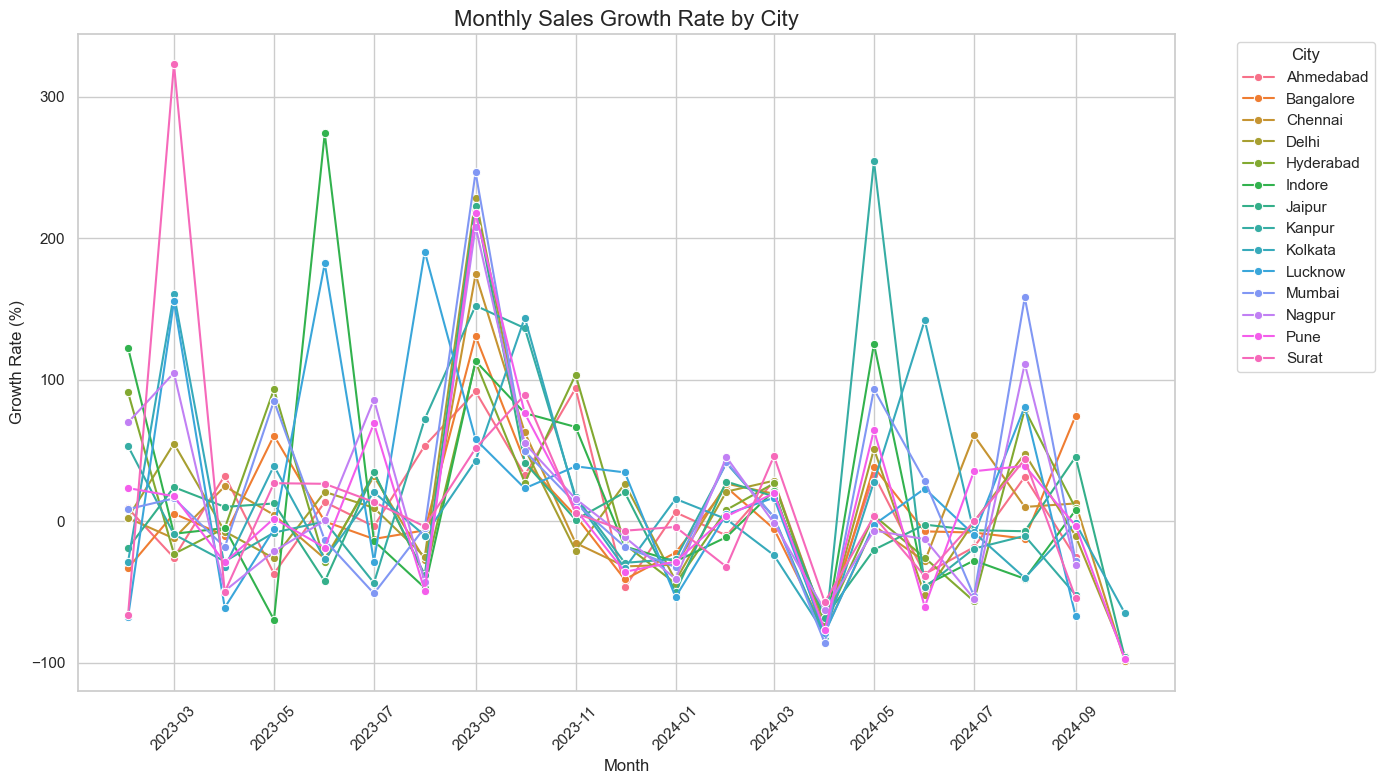

In [71]:
df9['date'] = pd.to_datetime(df9[['year', 'month']].assign(day=1))

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

sns.lineplot(data=df9, x='date', y='growth_ratio', hue='city_name', marker='o')

plt.title("Monthly Sales Growth Rate by City", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Growth Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Q.10 Market Potential Analysis
### *Identify top 3 city based on highest sales, return city name, total sale, total rent, total customers, estimated coffee consumer


In [74]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Imarticus",
    database="project"
)

query10 = """WITH city_table AS (
    SELECT 
        ci.city_name,
        SUM(s.total) AS total_revenue,
        COUNT(DISTINCT s.customer_id) AS total_cx,
        ROUND(SUM(s.total) / COUNT(DISTINCT s.customer_id), 2) AS avg_sale_pr_cx
    FROM sales s
    JOIN customers c ON s.customer_id = c.customer_id
    JOIN city ci ON ci.city_id = c.city_id
    GROUP BY ci.city_name
),
city_rent AS (
    SELECT 
        city_name, 
        estimated_rent,
        ROUND((population * 0.25) / 1000000, 3) AS estimated_coffee_consumer_in_millions
    FROM city
)
SELECT 
    cr.city_name,
    ct.total_revenue,
    cr.estimated_rent AS total_rent,
    ct.total_cx,
    cr.estimated_coffee_consumer_in_millions,
    ct.avg_sale_pr_cx,
    ROUND(cr.estimated_rent / ct.total_cx, 2) AS avg_rent_per_cx
FROM city_rent cr
JOIN city_table ct ON cr.city_name = ct.city_name
ORDER BY ct.total_revenue DESC;
"""

df10 = pd.read_sql(query10, conn)
conn.close()

C:\Users\hp\AppData\Local\Temp\ipykernel_14416\233922919.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df10 = pd.read_sql(query10, conn)


In [75]:
df10

,city_name,total_revenue,total_rent,total_cx,estimated_coffee_consumer_in_millions,avg_sale_pr_cx,avg_rent_per_cx
0,Pune,1258290.0,15300.0,52,1.875,24197.88,294.23
1,Chennai,944120.0,17100.0,42,2.775,22479.05,407.14
2,Bangalore,860110.0,29700.0,39,3.075,22054.10,761.54
3,Jaipur,803450.0,10800.0,69,1.000,11644.20,156.52
4,Delhi,750420.0,22500.0,68,7.750,11035.59,330.88
5,Mumbai,235000.0,31500.0,27,5.100,8703.70,1166.67
6,Kanpur,213550.0,8100.0,35,0.775,6101.43,231.43
7,Surat,176540.0,13500.0,27,1.800,6538.52,500.00
8,Kolkata,171460.0,16200.0,28,3.725,6123.57,578.57
9,Nagpur,140050.0,7200.0,24,0.725,5835.42,300.00


C:\Users\hp\AppData\Local\Temp\ipykernel_14416\1308223337.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top3_df, x='city_name', y=metric, palette="pastel")
C:\Users\hp\AppData\Local\Temp\ipykernel_14416\1308223337.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top3_df, x='city_name', y=metric, palette="pastel")
C:\Users\hp\AppData\Local\Temp\ipykernel_14416\1308223337.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top3_df, x='city_name', y=metric, palette="pastel")
C:\Users\hp\AppData\Local\Temp\ipykernel_14

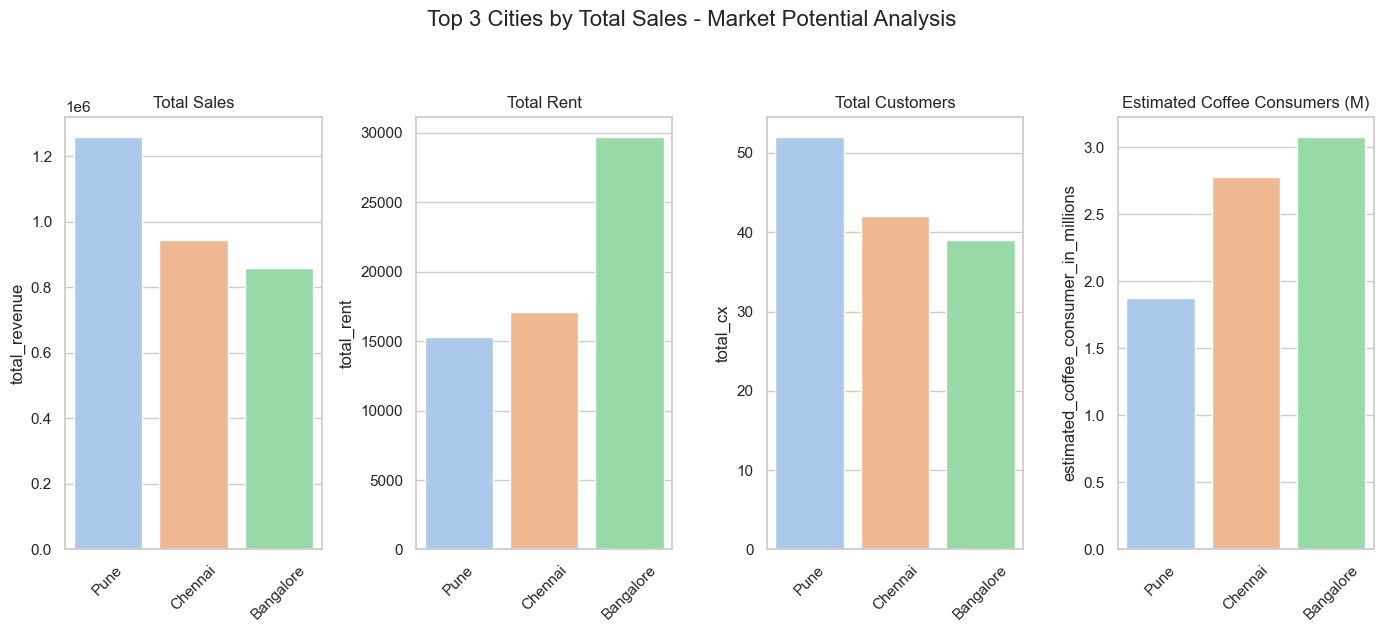

In [78]:
# Get top 3 cities based on total revenue
top3_df = df10.nlargest(3, 'total_revenue')

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

metrics = ['total_revenue', 'total_rent', 'total_cx', 'estimated_coffee_consumer_in_millions']
titles = ['Total Sales', 'Total Rent', 'Total Customers', 'Estimated Coffee Consumers (M)']

for i, metric in enumerate(metrics):
    plt.subplot(1, 4, i + 1)
    sns.barplot(data=top3_df, x='city_name', y=metric, palette="pastel")
    plt.title(titles[i])
    plt.xlabel('')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Top 3 Cities by Total Sales - Market Potential Analysis', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


### 1. Pune — Top Recommended City
Highest Total Revenue: ₹1,258,290
👉 Shows Pune generates the most money among all cities.

Highest Average Sale per Customer: ₹24,198
👉 Indicates that customers in Pune are spending a lot on coffee.

Low Average Rent per Customer: ₹294.23
👉 Cost to serve customers is low, increasing profitability.

Healthy Customer Base: 52 unique customers

Estimated Coffee Consumers: 1.875 million
👉 Good market size.

✅ Why Recommend Pune: High spending customers + low cost + high revenue = excellent profit potential.

### 2. Chennai — High Revenue Potential with Efficient Cost
2nd Highest Total Revenue: ₹944,120

Very High Average Sale per Customer: ₹22,479
👉 Indicates strong individual customer purchasing power.

Moderate Average Rent per Customer: ₹407.14
👉 Still under ₹500, considered manageable.

Customer Count: 42 unique customers

Estimated Coffee Consumers: 2.775 million
👉 A large target market.

✅ Why Recommend Chennai: Strong revenue, powerful consumer base, and scalable potential.

### 3. Bangalore — Strong Spending, Massive Market
3rd Highest Total Revenue: ₹860,110

High Average Sale per Customer: ₹22,054
👉 Customers spend well on coffee.

High Rent per Customer: ₹761.54
❗ Slight downside, but offset by revenue.

Customer Count: 39

Estimated Coffee Consumers: 3.075 million
👉 One of the largest coffee-drinking populations.

✅ Why Recommend Bangalore: Large market and high per-customer revenue outweigh the slightly higher operational cost.